In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_openml
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [97]:
# Load Iris dataset
iris_data = load_iris()
X_iris = iris_data.data
y_iris = iris_data.target



In [98]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X_heart = data.data
y_heart = data.target


# 3. Implementation of Regularization Methods

## 3.1 Ridge Regression Implementation

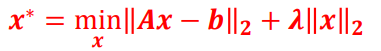

In [100]:
import numpy as np

def ridge_regression(X, y, alpha, num_iterations=10000, learning_rate=0.01):

    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for _ in range(num_iterations):
        y_pred = np.dot(X, weights) + bias
        dw = (-2 / m) * np.dot(X.T, (y - y_pred)) + 2 * alpha * weights  # Ridge term: 2 * alpha * weights
        db = (-2 / m) * np.sum(y - y_pred)
        weights -= learning_rate * dw
        bias -= learning_rate * db



    return weights, bias


##3.2 LASSO Regression Implementation


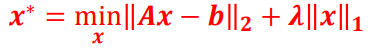

In [101]:
def lasso_regression(X, y, alpha, num_iterations=10000, learning_rate=0.01):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for _ in range(num_iterations):
        y_pred = np.dot(X, weights) + bias
        dw = (-2 / m) * np.dot(X.T, (y.reshape(y_pred.shape) - y_pred)) + alpha * np.sign(weights)
        db = (-2 / m) * np.sum(y - y_pred)
        weights -= learning_rate * dw
        bias -= learning_rate * db


    return weights, bias

##3.3 Elastic Net Regression Implementation


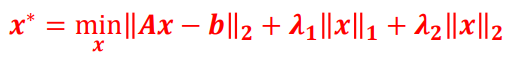

In [102]:
def elastic_net_regression(X, y, alpha, l1_ratio=0.5, num_iterations=10000, learning_rate=0.01):

    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for _ in range(num_iterations):
        y_pred = np.dot(X, weights) + bias
        # combine: L1 + L2
        dw = (-2 / m) * np.dot(X.T, (y - y_pred)) + alpha * (l1_ratio * np.sign(weights) + (1 - l1_ratio) * 2 * weights)
        db = (-2 / m) * np.sum(y - y_pred)
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias


#4. Finding the Optimal Regularization Parameter 𝜆

##4.1 Cross-validation for Ridge, LASSO, and Elastic Net

In [103]:
def cross_validation(X, y, model_function, alphas, num_iterations=10000, learning_rate=0.0001, l1_ratio=None):

    best_alpha = None
    best_mse = float('inf')

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    for alpha in alphas:
        if model_function == elastic_net_regression:
            weights, bias = model_function(X_train, y_train, alpha, l1_ratio=l1_ratio, num_iterations=num_iterations, learning_rate=learning_rate)
        else:
            weights, bias = model_function(X_train, y_train, alpha, num_iterations=num_iterations, learning_rate=learning_rate)

        y_pred = np.dot(X_val, weights) + bias
        mse = mean_squared_error(y_val, y_pred)

        if mse < best_mse:
            best_mse = mse
            best_alpha = alpha

    return best_alpha, best_mse


In [113]:
alphas = np.logspace(0.1,1, 10)

# Ridge
best_ridge_alpha_iris, best_ridge_mse_iris = cross_validation(X_iris, y_iris, ridge_regression, alphas)
print(f"Best alpha for Ridge Regression (Iris): {best_ridge_alpha_iris}, MSE: {best_ridge_mse_iris}")

# LASSO
best_lasso_alpha_iris, best_lasso_mse_iris = cross_validation(X_iris, y_iris, lasso_regression, alphas)
print(f"Best alpha for LASSO Regression (Iris): {best_lasso_alpha_iris}, MSE: {best_lasso_mse_iris}")

# Elastic Net
best_elastic_net_alpha_iris = None
best_elastic_net_mse_iris = float('inf')
best_l1_ratio_iris = None

l1_ratios = [0.1, 0.5, 0.9]
for l1_ratio in l1_ratios:
    best_alpha, best_mse = cross_validation(X_iris, y_iris, elastic_net_regression, alphas, l1_ratio=l1_ratio)
    if best_mse < best_elastic_net_mse_iris:
        best_elastic_net_mse_iris = best_mse
        best_elastic_net_alpha_iris = best_alpha
        best_l1_ratio_iris = l1_ratio

print(f"Best alpha for ElasticNet Regression (Iris): {best_elastic_net_alpha_iris}, Best L1 ratio: {best_l1_ratio_iris}, MSE: {best_elastic_net_mse_iris}")


print("\n---------------------------------------------------------------------")

# Ridge
best_ridge_alpha_heart, best_ridge_mse_heart = cross_validation(X_heart, y_heart, ridge_regression, alphas)
print(f"Best alpha for Ridge Regression (Heart Disease): {best_ridge_alpha_heart}, MSE: {best_ridge_mse_heart}")


# LASSO
best_lasso_alpha_heart, best_lasso_mse_heart = cross_validation(X_heart, y_heart, lasso_regression, alphas)
print(f"Best alpha for LASSO Regression (Heart Disease): {best_lasso_alpha_heart}, MSE: {best_lasso_mse_heart}")

# Elastic Net
best_elastic_net_alpha_heart = None
best_elastic_net_mse_heart = float('inf')
best_l1_ratio_heart = None

for l1_ratio in l1_ratios:
    best_alpha, best_mse = cross_validation(X_heart, y_heart, elastic_net_regression, alphas, l1_ratio=l1_ratio)
    if best_mse < best_elastic_net_mse_heart:
        best_elastic_net_mse_heart = best_mse
        best_elastic_net_alpha_heart = best_alpha
        best_l1_ratio_heart = l1_ratio

print(f"Best alpha for ElasticNet Regression (Heart Disease): {best_elastic_net_alpha_heart}, Best L1 ratio: {best_l1_ratio_heart}, MSE: {best_elastic_net_mse_heart}")


Best alpha for Ridge Regression (Iris): 1.2589254117941673, MSE: 0.12723128875792158
Best alpha for LASSO Regression (Iris): 1.2589254117941673, MSE: 0.5076410229752267
Best alpha for ElasticNet Regression (Iris): 1.2589254117941673, Best L1 ratio: 0.1, MSE: 0.14432861097876787

---------------------------------------------------------------------
Best alpha for Ridge Regression (Heart Disease): 1.2589254117941673, MSE: 3492.5463956339677
Best alpha for LASSO Regression (Heart Disease): 7.943282347242816, MSE: 3325.17967000877
Best alpha for ElasticNet Regression (Heart Disease): 3.9810717055349722, Best L1 ratio: 0.9, MSE: 3361.885909571602


##4.2 Cross-validation Diagrams

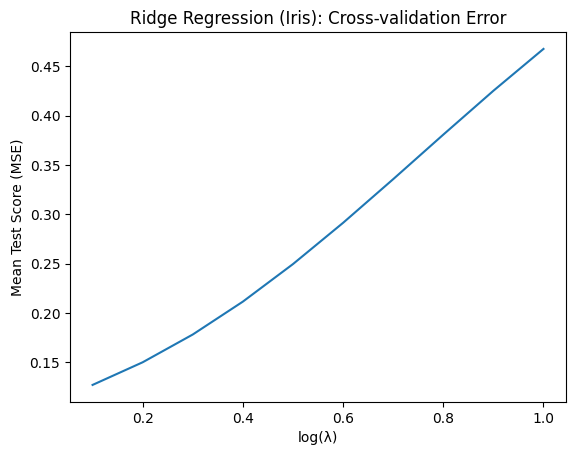

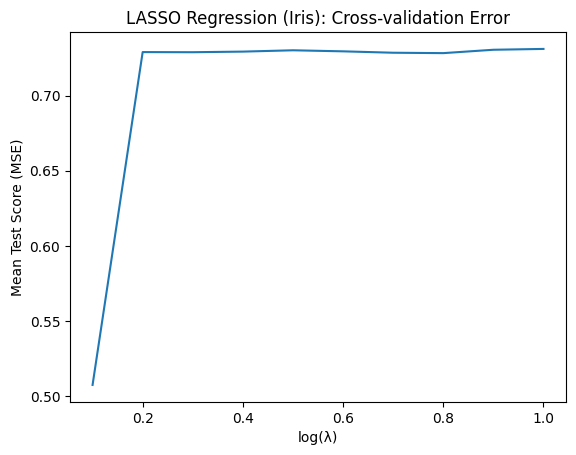

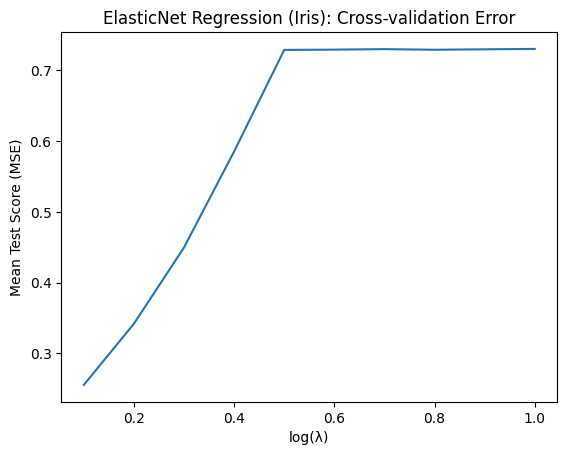

In [115]:
# 4.2.1  for Iris

# Ridge
plt.plot(np.log10(alphas), [cross_validation(X_iris, y_iris, ridge_regression, np.array([alpha]))[1] for alpha in alphas])
plt.title('Ridge Regression (Iris): Cross-validation Error')
plt.xlabel('log(λ)')
plt.ylabel('Mean Test Score (MSE)')
plt.show()

# LASSO
plt.plot(np.log10(alphas), [cross_validation(X_iris, y_iris, lasso_regression, np.array([alpha]))[1] for alpha in alphas])
plt.title('LASSO Regression (Iris): Cross-validation Error')
plt.xlabel('log(λ)')
plt.ylabel('Mean Test Score (MSE)')
plt.show()

# ElasticNet
plt.plot(np.log10(alphas), [cross_validation(X_iris, y_iris, elastic_net_regression, np.array([alpha]), l1_ratio=0.5)[1] for alpha in alphas])
plt.title('ElasticNet Regression (Iris): Cross-validation Error')
plt.xlabel('log(λ)')
plt.ylabel('Mean Test Score (MSE)')
plt.show()



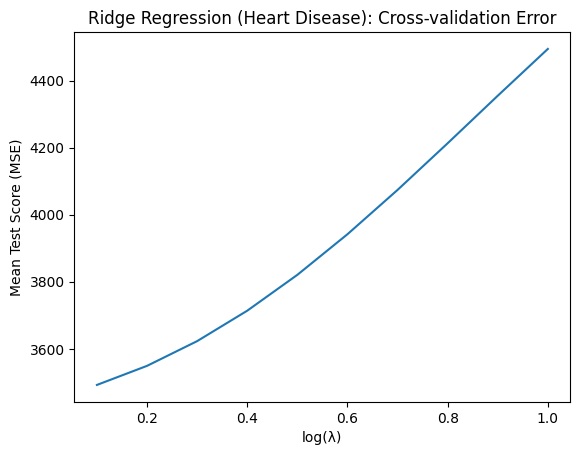

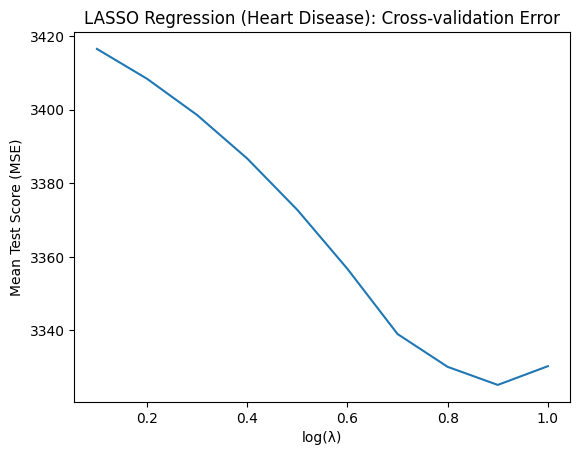

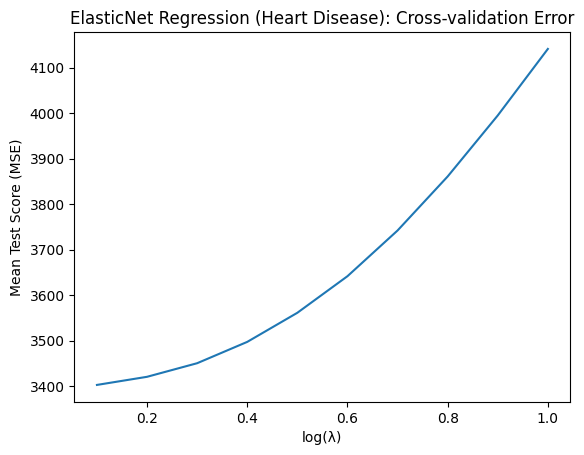

In [116]:
# 4.2.2 for Heart

# Ridge
plt.plot(np.log10(alphas), [cross_validation(X_heart, y_heart, ridge_regression, np.array([alpha]))[1] for alpha in alphas])
plt.title('Ridge Regression (Heart Disease): Cross-validation Error')
plt.xlabel('log(λ)')
plt.ylabel('Mean Test Score (MSE)')
plt.show()

# LASSO
plt.plot(np.log10(alphas), [cross_validation(X_heart, y_heart, lasso_regression, np.array([alpha]))[1] for alpha in alphas])
plt.title('LASSO Regression (Heart Disease): Cross-validation Error')
plt.xlabel('log(λ)')
plt.ylabel('Mean Test Score (MSE)')
plt.show()

# ElasticNet
plt.plot(np.log10(alphas), [cross_validation(X_heart, y_heart, elastic_net_regression, np.array([alpha]), l1_ratio=0.5)[1] for alpha in alphas])
plt.title('ElasticNet Regression (Heart Disease): Cross-validation Error')
plt.xlabel('log(λ)')
plt.ylabel('Mean Test Score (MSE)')
plt.show()


#5. Comparison of Results Between the Methods


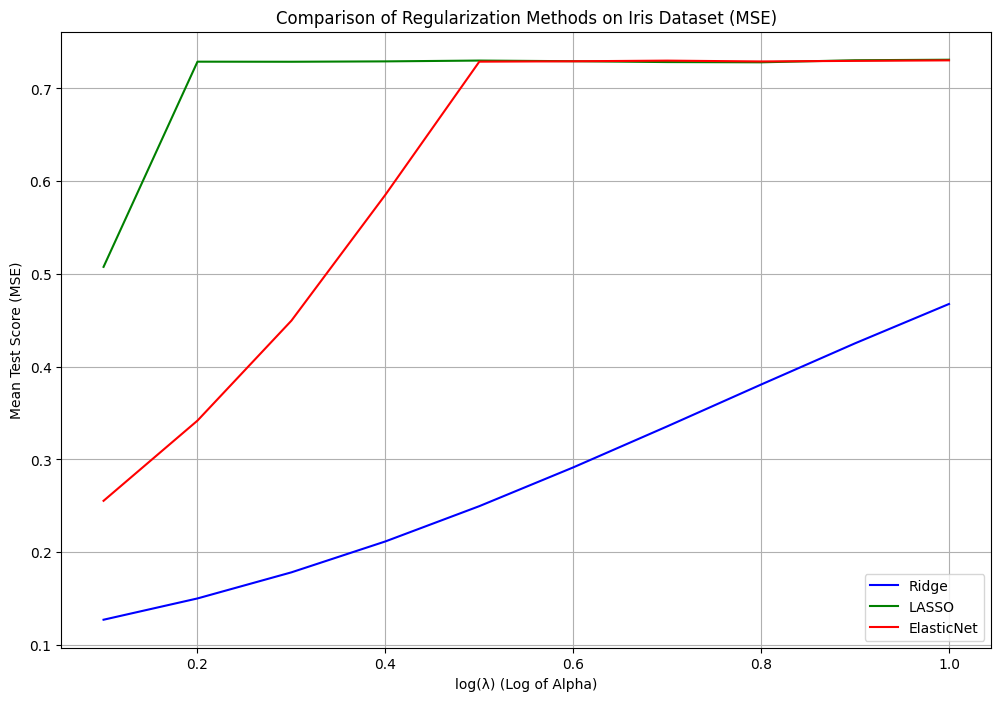

In [117]:


# Plotting MSE for Ridge, LASSO, and ElasticNet
plt.figure(figsize=(12, 8))

# Ridge
plt.plot(np.log10(alphas), [cross_validation(X_iris, y_iris, ridge_regression, np.array([alpha]))[1] for alpha in alphas], label="Ridge", linestyle='-', color='b')

# LASSO
plt.plot(np.log10(alphas), [cross_validation(X_iris, y_iris, lasso_regression, np.array([alpha]))[1] for alpha in alphas], label="LASSO", linestyle='-', color='g')

# ElasticNet
plt.plot(np.log10(alphas), [cross_validation(X_iris, y_iris, elastic_net_regression, np.array([alpha]), l1_ratio=0.5)[1] for alpha in alphas], label="ElasticNet", linestyle='-', color='r')

# Customize plot
plt.title('Comparison of Regularization Methods on Iris Dataset (MSE)')
plt.xlabel('log(λ) (Log of Alpha)')
plt.ylabel('Mean Test Score (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [108]:

print("Best Results for Iris Dataset:")

# Ridge Regression
print(f"Best Ridge Alpha: {best_ridge_alpha_iris}, MSE: {best_ridge_mse_iris}")

# LASSO Regression
print(f"Best LASSO Alpha: {best_lasso_alpha_iris}, MSE: {best_lasso_mse_iris}")

# ElasticNet Regression
print(f"Best ElasticNet Alpha: {best_elastic_net_alpha_iris}, Best L1 Ratio: {best_l1_ratio_iris}, MSE: {best_elastic_net_mse_iris}")


Best Results for Iris Dataset:
Best Ridge Alpha: 1.2589254117941673, MSE: 0.12723128875792158
Best LASSO Alpha: 1.2589254117941673, MSE: 0.5076410229752267
Best ElasticNet Alpha: 1.2589254117941673, Best L1 Ratio: 0.1, MSE: 0.14432861097876787


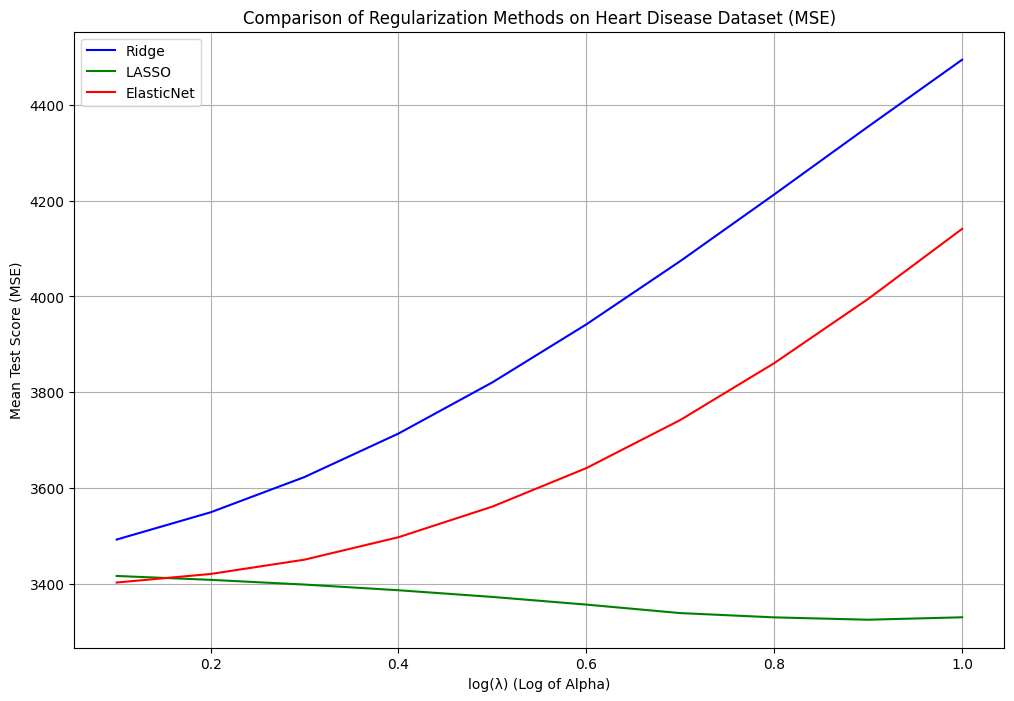

In [107]:

# Plotting MSE for Ridge, LASSO, and ElasticNet
plt.figure(figsize=(12, 8))

# Ridge
plt.plot(np.log10(alphas), [cross_validation(X_heart, y_heart, ridge_regression, np.array([alpha]))[1] for alpha in alphas], label="Ridge", linestyle='-', color='b')

# LASSO
plt.plot(np.log10(alphas), [cross_validation(X_heart, y_heart, lasso_regression, np.array([alpha]))[1] for alpha in alphas], label="LASSO", linestyle='-', color='g')

# ElasticNet
plt.plot(np.log10(alphas), [cross_validation(X_heart, y_heart, elastic_net_regression, np.array([alpha]), l1_ratio=0.5)[1] for alpha in alphas], label="ElasticNet", linestyle='-', color='r')

# Customize plot
plt.title('Comparison of Regularization Methods on Heart Disease Dataset (MSE)')
plt.xlabel('log(λ) (Log of Alpha)')
plt.ylabel('Mean Test Score (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [109]:

print("\nBest Results for Heart Disease Dataset:")

# Ridge Regression
print(f"Best Ridge Alpha: {best_ridge_alpha_heart}, MSE: {best_ridge_mse_heart}")

# LASSO Regression
print(f"Best LASSO Alpha: {best_lasso_alpha_heart}, MSE: {best_lasso_mse_heart}")

# ElasticNet Regression
print(f"Best ElasticNet Alpha: {best_elastic_net_alpha_heart}, Best L1 Ratio: {best_l1_ratio_heart}, MSE: {best_elastic_net_mse_heart}")



Best Results for Heart Disease Dataset:
Best Ridge Alpha: 1.2589254117941673, MSE: 3492.5463956339677
Best LASSO Alpha: 7.943282347242816, MSE: 3325.17967000877
Best ElasticNet Alpha: 3.9810717055349722, Best L1 Ratio: 0.9, MSE: 3361.885909571602


#6. Comparison with Python Built-in Libraries

In [118]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

ridge_builtin = Ridge(alpha=best_ridge_alpha_iris)
ridge_builtin.fit(X_train, y_train)
ridge_builtin_pred = ridge_builtin.predict(X_test)
ridge_builtin_mse = mean_squared_error(y_test, ridge_builtin_pred)

print(f'Ridge (Built-in) MSE (Iris): {ridge_builtin_mse}')


Ridge (Built-in) MSE (Iris): 0.039542156931972126


In [119]:

lasso_builtin = Lasso(alpha=best_lasso_alpha_iris)
lasso_builtin.fit(X_train, y_train)
lasso_builtin_pred = lasso_builtin.predict(X_test)
lasso_builtin_mse = mean_squared_error(y_test, lasso_builtin_pred)

print(f'LASSO (Built-in) MSE (Iris): {lasso_builtin_mse}')




LASSO (Built-in) MSE (Iris): 0.6240435723960628


In [120]:
elastic_net_builtin = ElasticNet(alpha=best_elastic_net_alpha_iris, l1_ratio=best_l1_ratio_iris)
elastic_net_builtin.fit(X_train, y_train)
elastic_net_builtin_pred = elastic_net_builtin.predict(X_test)
elastic_net_builtin_mse = mean_squared_error(y_test, elastic_net_builtin_pred)

print(f'ElasticNet (Built-in) MSE (Iris): {elastic_net_builtin_mse}')

ElasticNet (Built-in) MSE (Iris): 0.12270447520592397


In [122]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

ridge_builtin = Ridge(alpha=best_ridge_alpha_heart)
ridge_builtin.fit(X_train_heart, y_train_heart)
ridge_builtin_pred = ridge_builtin.predict(X_test_heart)
ridge_builtin_mse = mean_squared_error(y_test_heart, ridge_builtin_pred)

print(f'Ridge (Built-in) MSE (Heart Disease): {ridge_builtin_mse}')

lasso_builtin = Lasso(alpha=best_lasso_alpha_heart)
lasso_builtin.fit(X_train_heart, y_train_heart)
lasso_builtin_pred = lasso_builtin.predict(X_test_heart)
lasso_builtin_mse = mean_squared_error(y_test_heart, lasso_builtin_pred)

print(f'LASSO (Built-in) MSE (Heart Disease): {lasso_builtin_mse}')

elastic_net_builtin = ElasticNet(alpha=best_elastic_net_alpha_heart, l1_ratio=best_l1_ratio_heart)
elastic_net_builtin.fit(X_train_heart, y_train_heart)
elastic_net_builtin_pred = elastic_net_builtin.predict(X_test_heart)
elastic_net_builtin_mse = mean_squared_error(y_test_heart, elastic_net_builtin_pred)

print(f'ElasticNet (Built-in) MSE (Heart Disease): {elastic_net_builtin_mse}')


Ridge (Built-in) MSE (Heart Disease): 3161.5670777998675
LASSO (Built-in) MSE (Heart Disease): 5361.533457238513
ElasticNet (Built-in) MSE (Heart Disease): 5361.533457238513
